# 1. Importing Libraries

In [73]:
#importing Libraries
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


#models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

#for warning
from warnings import filterwarnings
filterwarnings("ignore")

# 2. Loading DataSet

In [74]:
#Load the dataset
data = pd.read_csv("/content/diabetes.csv")

# 3. Data Exploration

In [75]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [76]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [77]:
data.shape

(767, 9)

In [78]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.848761,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,3.370207,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [79]:
len(data)

767

In [80]:
data.ndim,data.size

(2, 6903)

In [81]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [82]:
data["Outcome"].value_counts()

Outcome
0    499
1    268
Name: count, dtype: int64

EXPLORATORY DATA ANALYSIS (EDA)

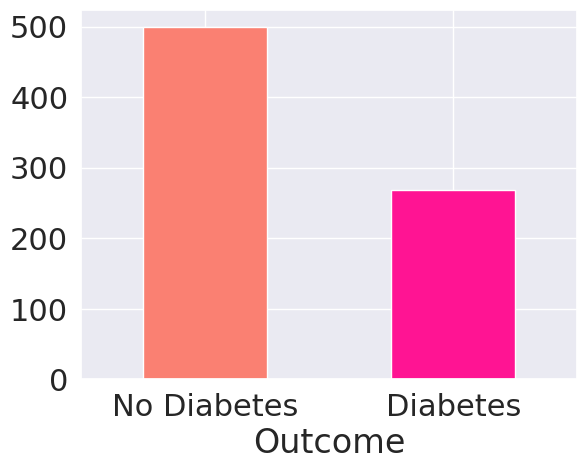

In [83]:
data["Outcome"].value_counts().plot(kind="bar",color=["salmon","deeppink"])
plt.xticks(np.arange(2), ('No Diabetes', 'Diabetes'),rotation=0);

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


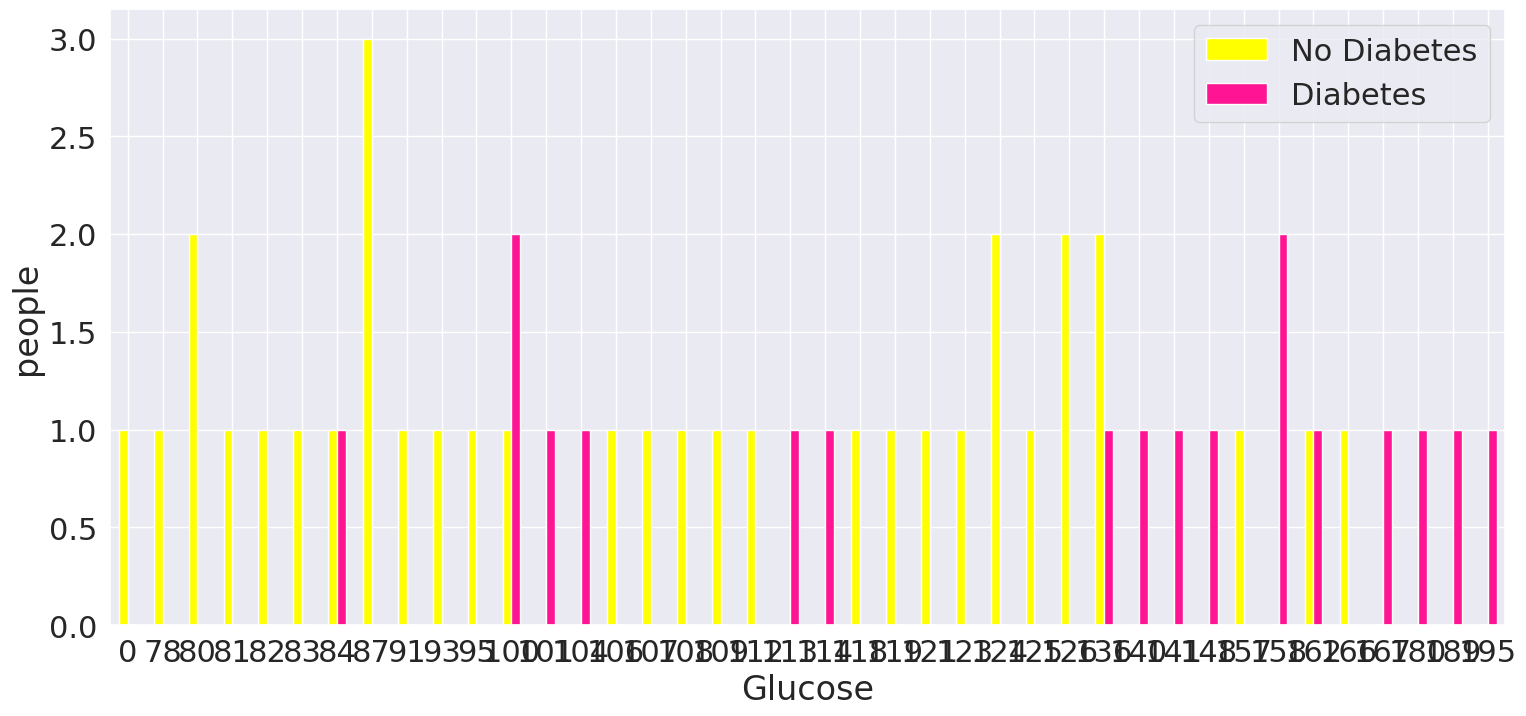

In [85]:
# Comparing Glucose with the Outcome
pd.crosstab(data.Glucose[::15],data.Outcome).plot(kind="bar",figsize=(18,8),color=["yellow","deeppink"])
plt.ylabel("people");
plt.xticks(rotation=0);
plt.legend(['No Diabetes', 'Diabetes']);

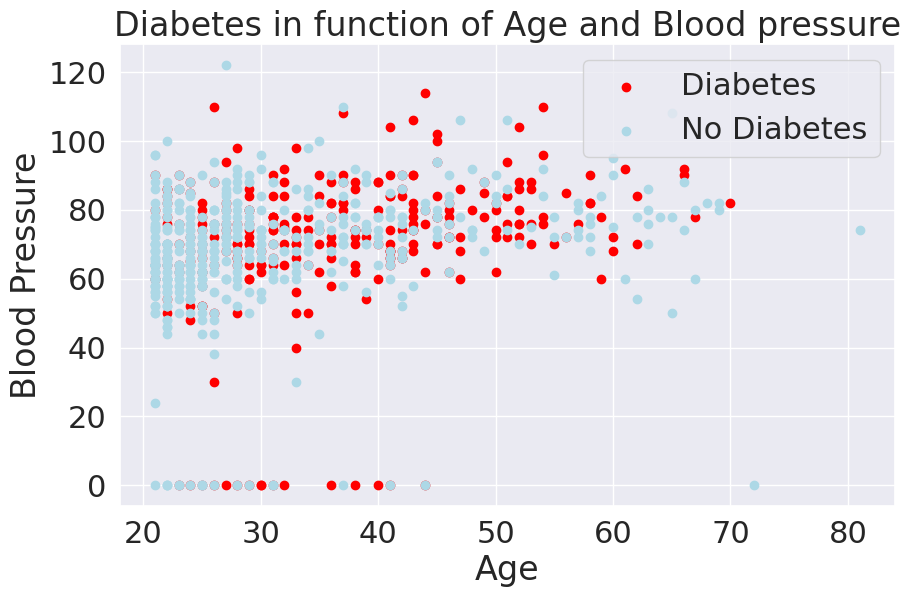

In [86]:
#finding out the Blood Pressure and age of entries who have diabetes
plt.figure(figsize=(10,6))
# Scatter with positive example
plt.scatter(data.Age[data.Outcome==1],data.BloodPressure[data.Outcome==1],c="Red");

# Scatter with negative example
plt.scatter(data.Age[data.Outcome==0],data.BloodPressure[data.Outcome==0],c="lightblue");

# Add some helpful info
plt.title("Diabetes in function of Age and Blood pressure")
plt.xlabel("Age")
plt.ylabel("Blood Pressure")
plt.legend(["Diabetes","No Diabetes"]);

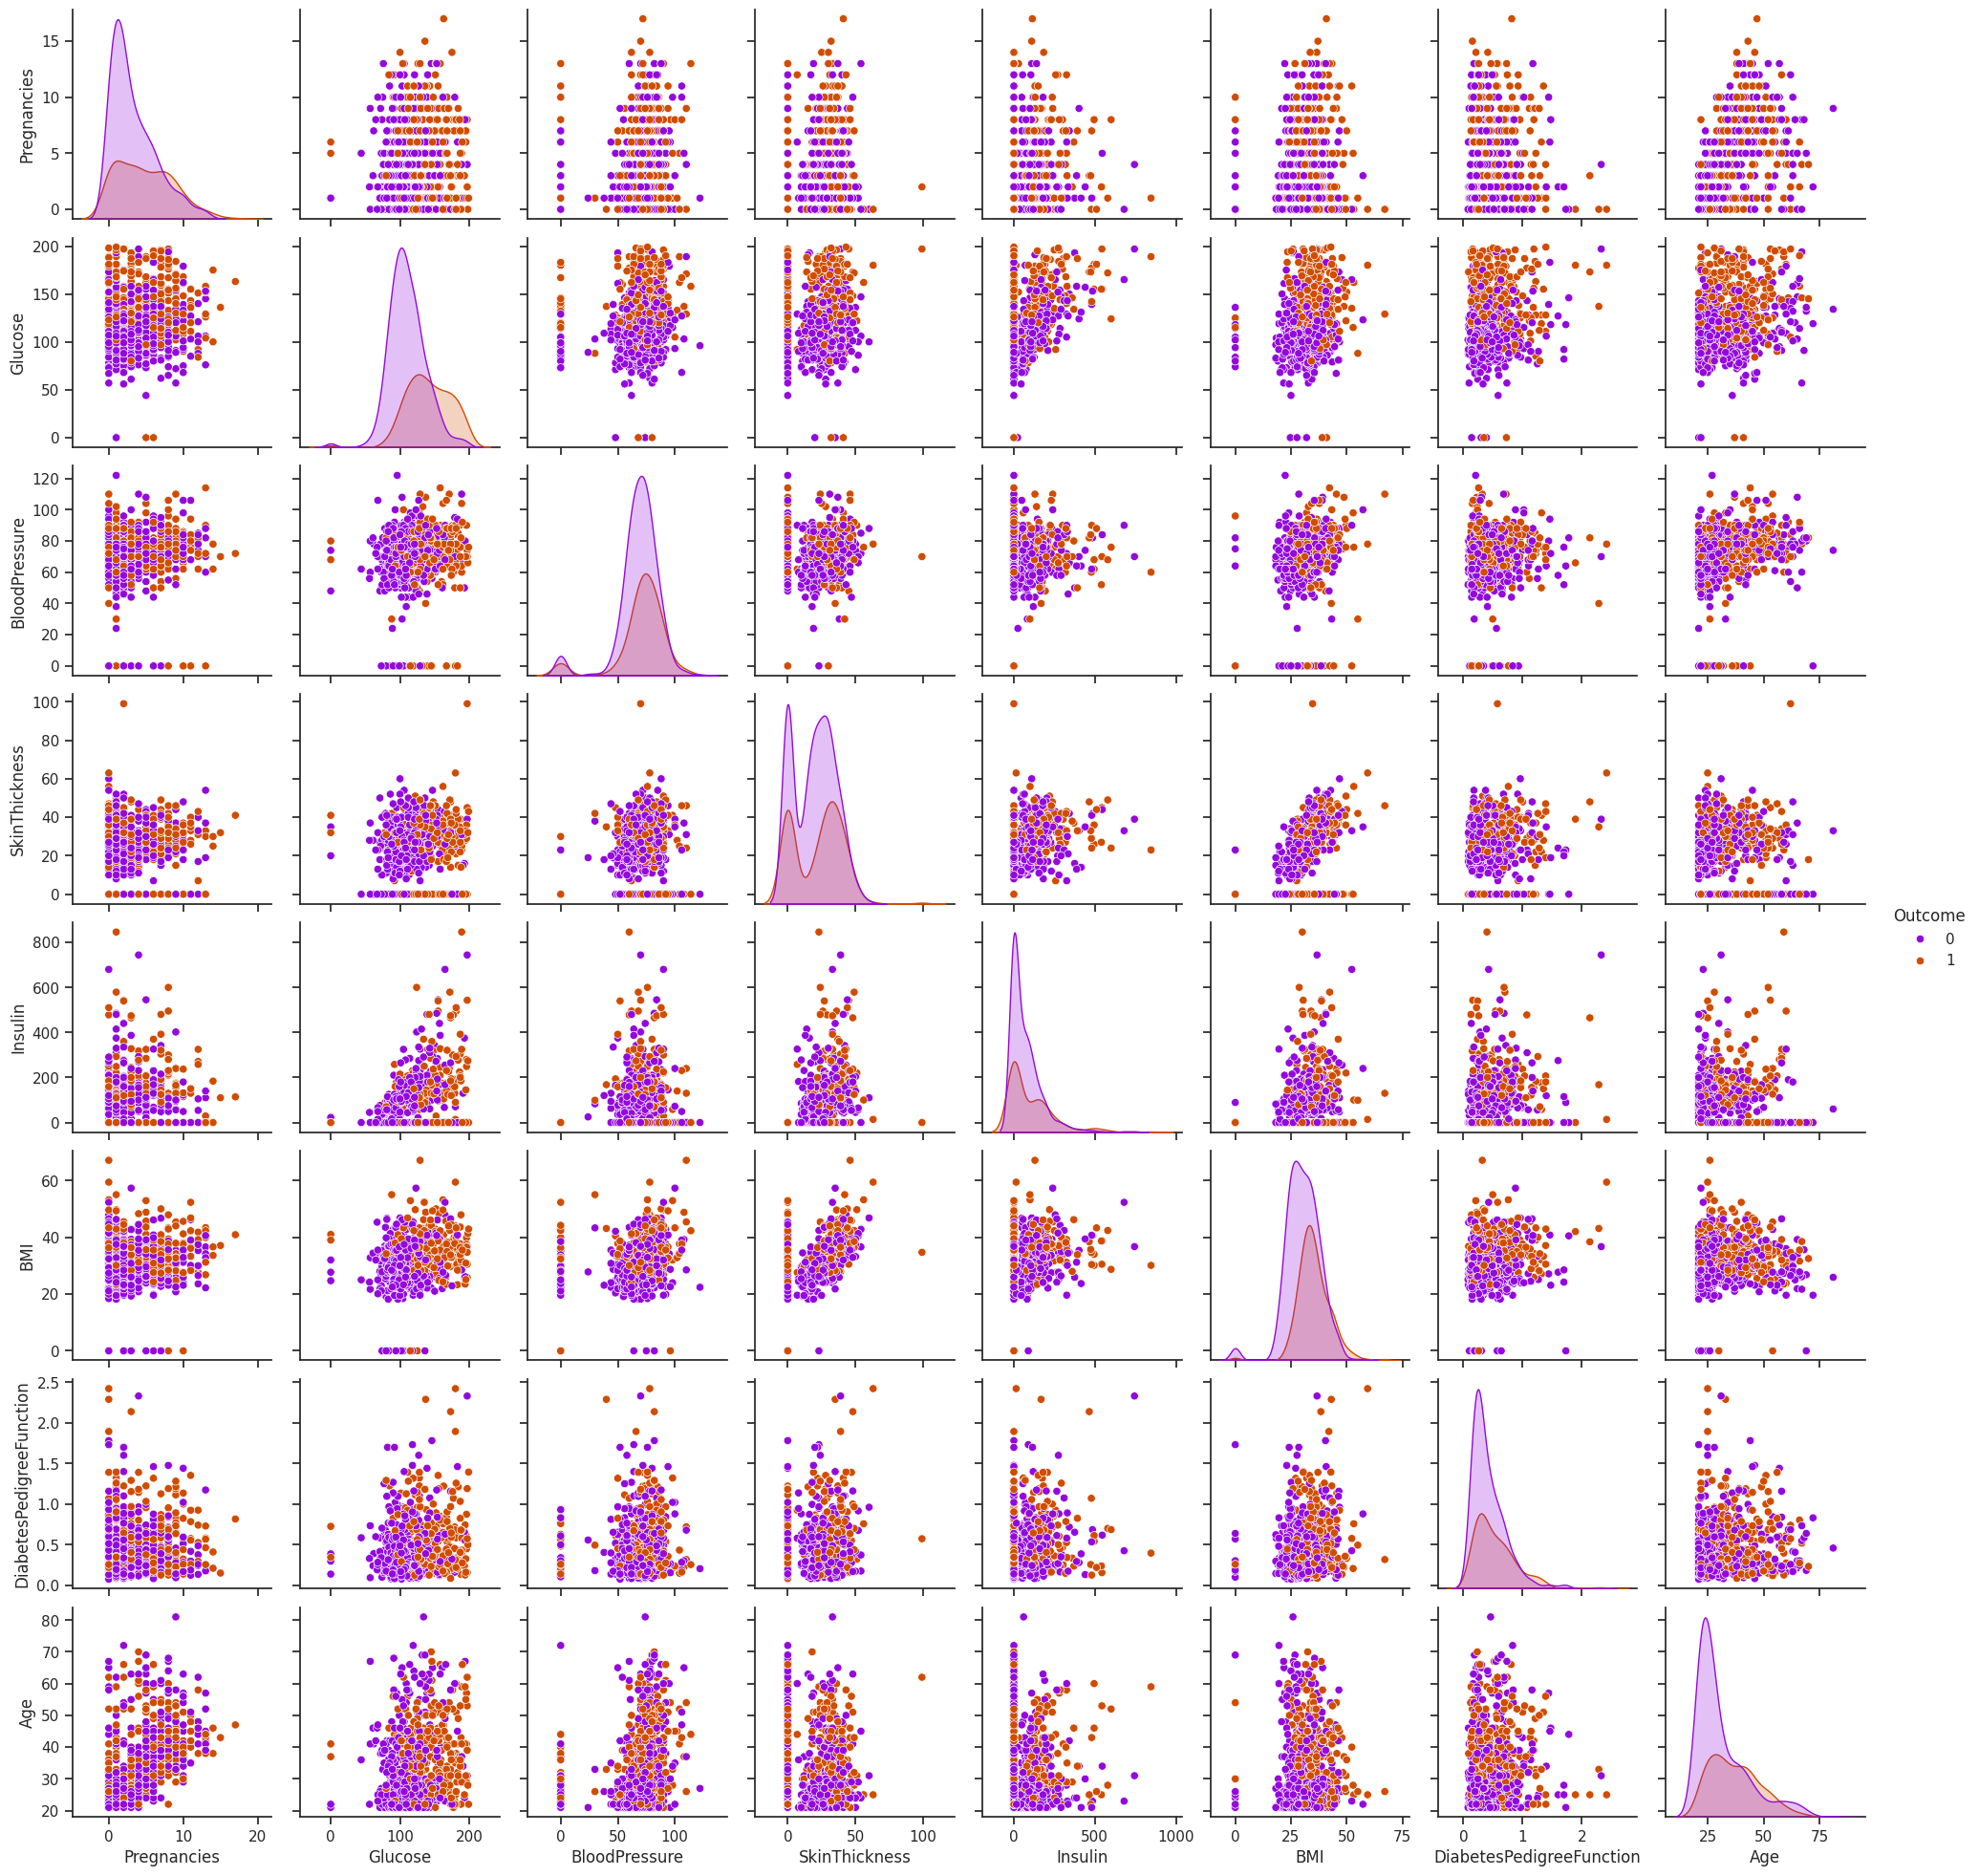

In [87]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(data,hue='Outcome',palette='gnuplot');

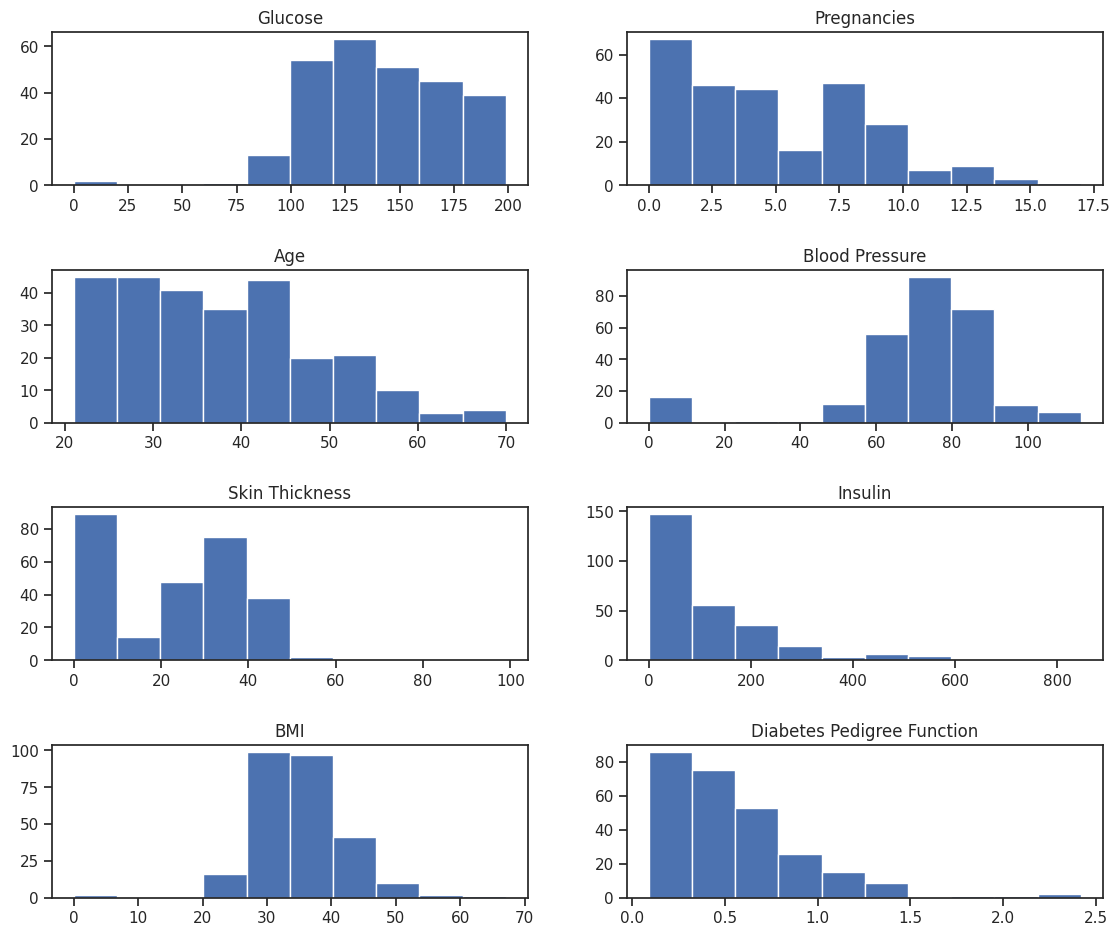

In [88]:
# Histogram of all coloumns when the Outcome is 1(Diabetes)
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(12, 10))
fig.tight_layout(pad=3.0)
ax[0,0].set_title('Glucose')
ax[0,0].hist(data.Glucose[data.Outcome==1]);
ax[0,1].set_title('Pregnancies')
ax[0,1].hist(data.Pregnancies[data.Outcome==1]);
ax[1,0].set_title('Age')
ax[1,0].hist(data.Age[data.Outcome==1]);
ax[1,1].set_title('Blood Pressure')
ax[1,1].hist(data.BloodPressure[data.Outcome==1]);
ax[2,0].set_title('Skin Thickness')
ax[2,0].hist(data.SkinThickness[data.Outcome==1]);
ax[2,1].set_title('Insulin')
ax[2,1].hist(data.Insulin[data.Outcome==1]);
ax[3,0].set_title('BMI')
ax[3,0].hist(data.BMI[data.Outcome==1]);
ax[3,1].set_title('Diabetes Pedigree Function')
ax[3,1].hist(data.DiabetesPedigreeFunction[data.Outcome==1]);

In [89]:
#corelation matrix
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128621,0.141399,-0.081009,-0.074356,0.017469,-0.034065,0.543904,0.221272
Glucose,0.128621,1.000000,0.152718,0.058120,0.330836,0.220957,0.136886,0.262783,0.466143
BloodPressure,0.141399,0.152718,1.000000,0.207390,0.089003,0.281825,0.041300,0.239699,0.065135
SkinThickness,-0.081009,0.058120,0.207390,1.000000,0.437635,0.392867,0.184412,-0.113312,0.075426
Insulin,-0.074356,0.330836,0.089003,0.437635,1.000000,0.197744,0.184728,-0.042985,0.129973
BMI,0.017469,0.220957,0.281825,0.392867,0.197744,1.000000,0.140546,0.036031,0.292612
DiabetesPedigreeFunction,-0.034065,0.136886,0.041300,0.184412,0.184728,0.140546,1.000000,0.033044,0.173478
Age,0.543904,0.262783,0.239699,-0.113312,-0.042985,0.036031,0.033044,1.000000,0.237725
Outcome,0.221272,0.466143,0.065135,0.075426,0.129973,0.292612,0.173478,0.237725,1.000000


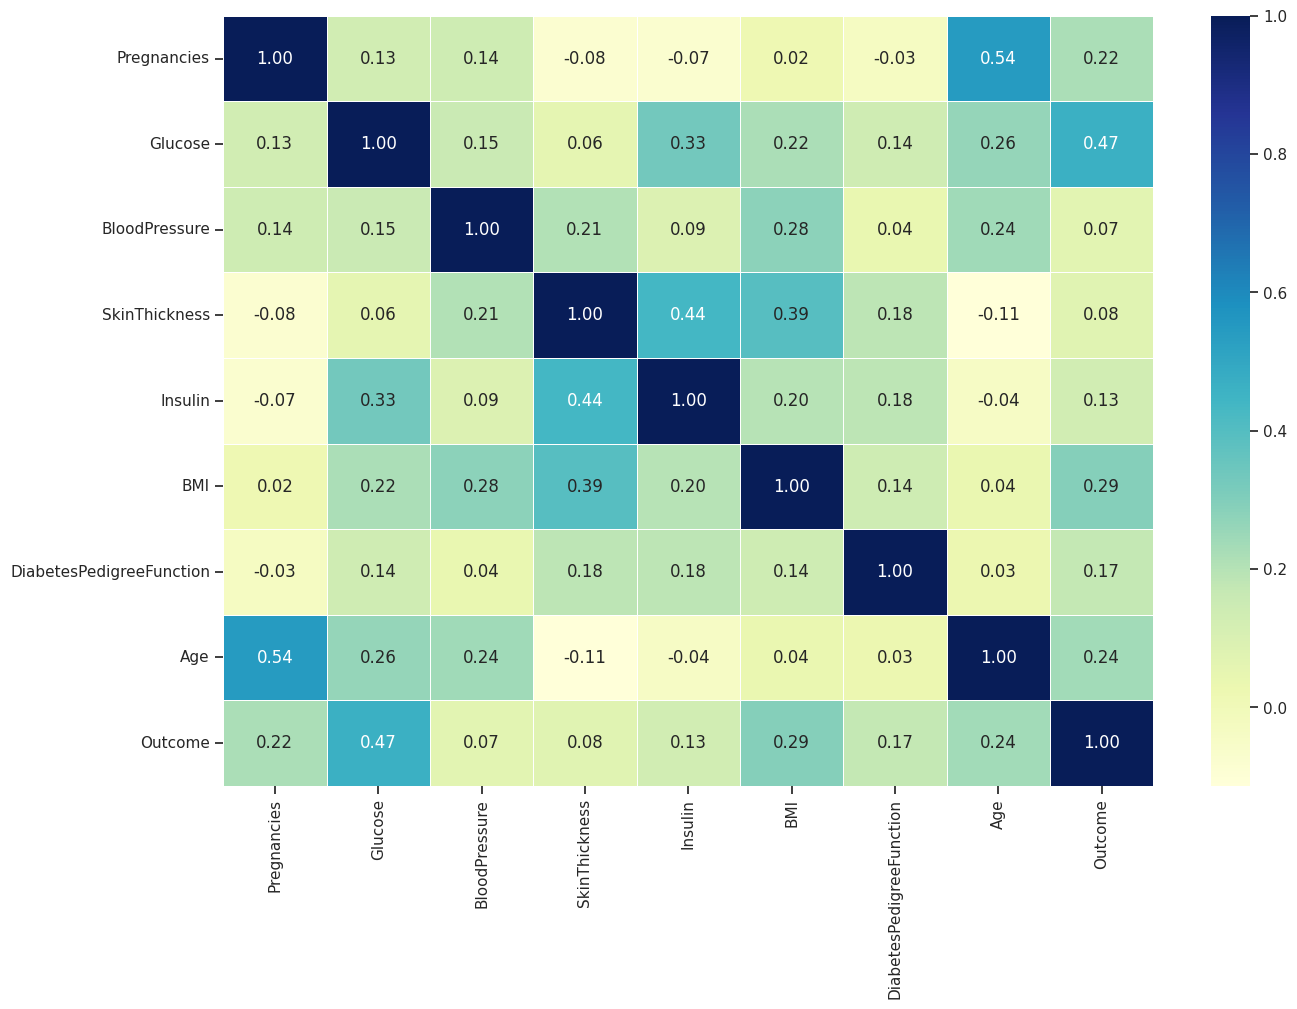

In [90]:
# make our correlation matrix visual
corr_matrix = data.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                linewidth=0.5,
                fmt=".2f",
                cmap="YlGnBu")

In [91]:
import numpy as np
from scipy.stats import skew, kurtosis

# Calculate mean, median, and standard deviation
mean_value = np.mean(data)
median_value = np.median(data)
std_deviation = np.std(data)

# Calculate skewness and kurtosis
skewness = skew(data)
kurt = kurtosis(data)


# Print summary statistics
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

Mean: 40.042298420976394
Median: 24.3
Standard Deviation: Pregnancies                   3.368010
Glucose                      31.956729
BloodPressure                19.355780
SkinThickness                15.947737
Insulin                     115.207929
BMI                           7.883950
DiabetesPedigreeFunction      0.331280
Age                          11.754409
Outcome                       0.476785
dtype: float64
Skewness: [ 0.89806466  0.17101261 -1.83863398  0.11137768  2.26618715 -0.42867799
  1.91403849  1.12578462  0.6316759 ]
Kurtosis: [ 0.14751779  0.62975839  5.12769556 -0.52480312  7.15056916  3.25421998
  5.53986412  0.62776547 -1.60098555]


# Outlier Detection:

Identify and investigate potential outliers that may impact analysis or modeling.
Decide on appropriate strategies for handling outliers, such as removal or transformation.

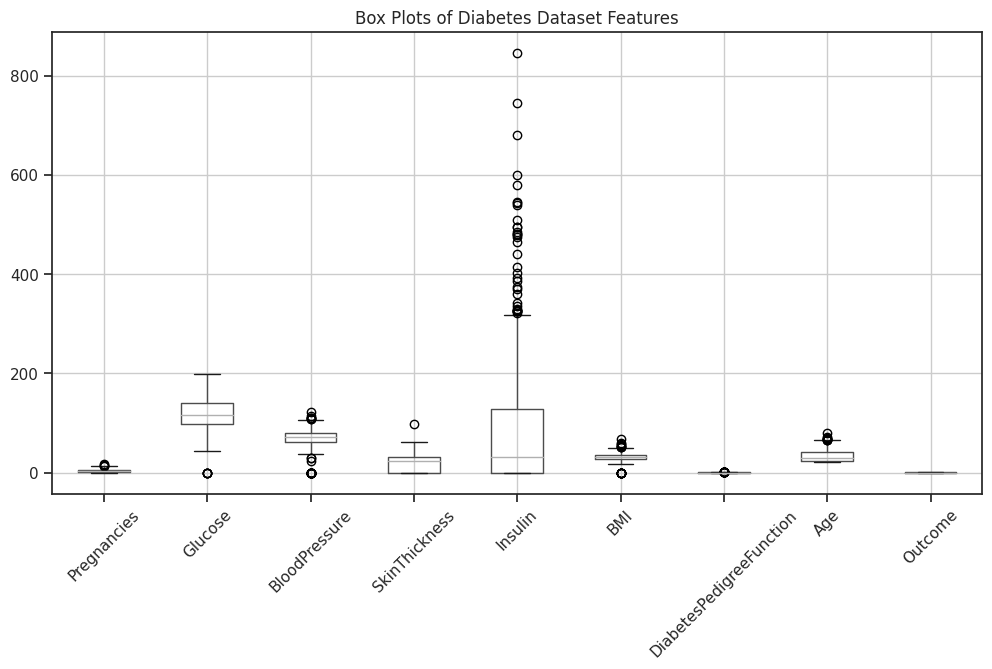

Indices of potential outliers:
Pregnancies: [  4   7   8   9  13  15  45  49  49  58  60  60  75  78  81  81  88 111
 123 145 153 159 172 177 182 186 193 220 222 228 228 247 261 266 269 286
 298 300 330 332 336 342 347 349 357 370 370 371 371 395 409 415 426 426
 430 435 445 445 453 453 455 459 468 484 486 494 494 502 522 522 533 535
 579 584 589 593 601 604 619 621 643 645 655 666 673 684 684 695 697 703
 706 706 753]
Glucose: [6 2 4 5 4 2 6 2 5 6 2 5 1 2 2 5 0 4 7 5 4 0 2 5 1 4 2 4 2 4 6 4 2 2 2 4 0
 2 6 2 2 1 2 1 2 4 6 5 6 6 4 4 2 5 2 2 5 6 2 7 0 7 2 2 4 2 5 1 2 5 2 2 3 4
 2 6 2 2 2 6 2 4 4 7 5 5 7 4 2 2 2 5 4]


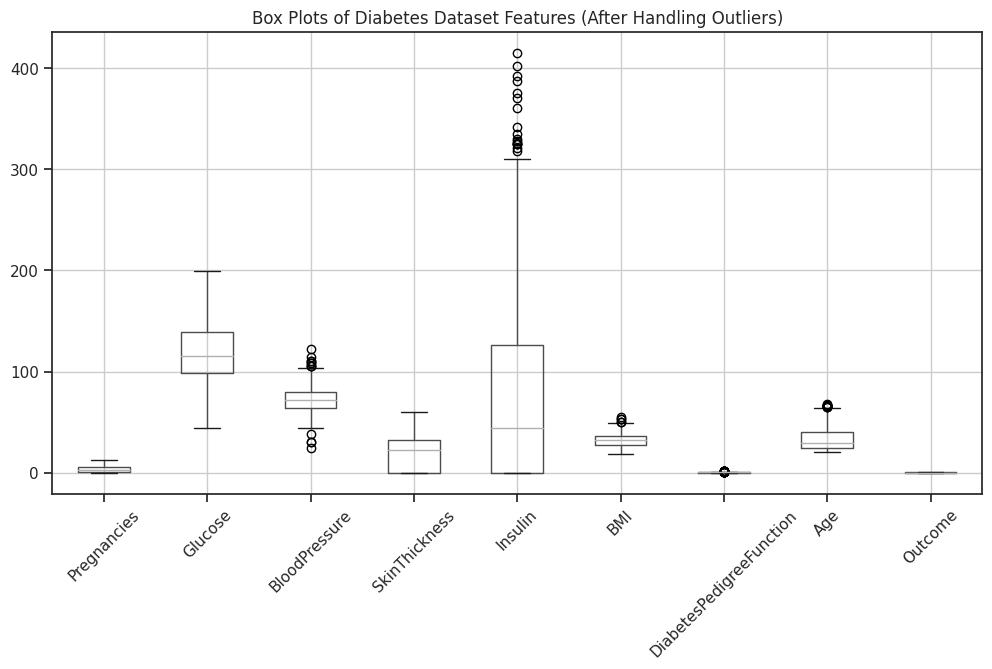

In [92]:

import matplotlib.pyplot as plt
from scipy import stats

# Load the diabetes dataset

column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]


# Visualize potential outliers using box plots
plt.figure(figsize=(12, 6))
data.boxplot(column=column_names)
plt.title("Box Plots of Diabetes Dataset Features")
plt.xticks(rotation=45)
plt.show()

# Identify potential outliers using the Z-score method
z_scores = np.abs(stats.zscore(data))
threshold = 3  # Adjust this threshold as needed
outlier_indices = np.where(z_scores > threshold)

# Print the indices of potential outliers
print("Indices of potential outliers:")
for feature, indices in zip(column_names, outlier_indices):
    print(f"{feature}: {indices}")

# Decide on appropriate strategies for handling outliers
# For example, you can remove the rows with outliers:
df_no_outliers = data[(z_scores <= threshold).all(axis=1)]

# Alternatively, you can transform the outliers, e.g., using a log transformation:
# df[column_names] = np.log1p(df[column_names])
# Recheck the dataset to ensure outliers have been properly handled

plt.figure(figsize=(12, 6))
df_no_outliers.boxplot(column=column_names)
plt.title("Box Plots of Diabetes Dataset Features (After Handling Outliers)")
plt.xticks(rotation=45)
plt.show()


# Model Selection

In [94]:
#random data shuffelin
data.sample(frac=1)

#Spliting the data
X = data.drop("Outcome",axis=1)
y = data["Outcome"]
X_train,X_test,y_train,y_test =  train_test_split(X,
                                              y,
                                              test_size=0.2, stratify= y)

In [95]:
(len(X_train),len(X_test))

(613, 154)

# 1. Logistic Regression

In [96]:
## Build an model (Logistic Regression)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
log_reg.fit(X_train,y_train);
## Evaluating the model
log_reg = log_reg.score(X_test,y_test)

# 2. KNN

In [97]:
## Build an model (KNN)
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn.fit(X_train,y_train);
## Evaluating the model
knn = knn.score(X_test,y_test)

# 3. Random Forest Classifier

In [98]:
## Build an model (Random forest classifier)
clf= RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
clf.fit(X_train,y_train);
## Evaluating the model
clf = clf.score(X_test,y_test)

# 4. Support Vector Machine (SVM)

In [99]:
## Build an model (Support Vector Machine)
svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
svm.fit(X_train,y_train)
svm = svm.score(X_test,y_test)

In [100]:
model_compare = pd.DataFrame({"Logistic Regression":log_reg,
                            "KNN":knn,
                            "Random Forest Classifier":clf,
                           "Support Vector Machine":svm,
                            },index=["accuracy"])

# Comaprison of Above Models

In [101]:
model_compare

,Logistic Regression,KNN,Random Forest Classifier,Support Vector Machine
accuracy,0.766234,0.727273,0.753247,0.746753


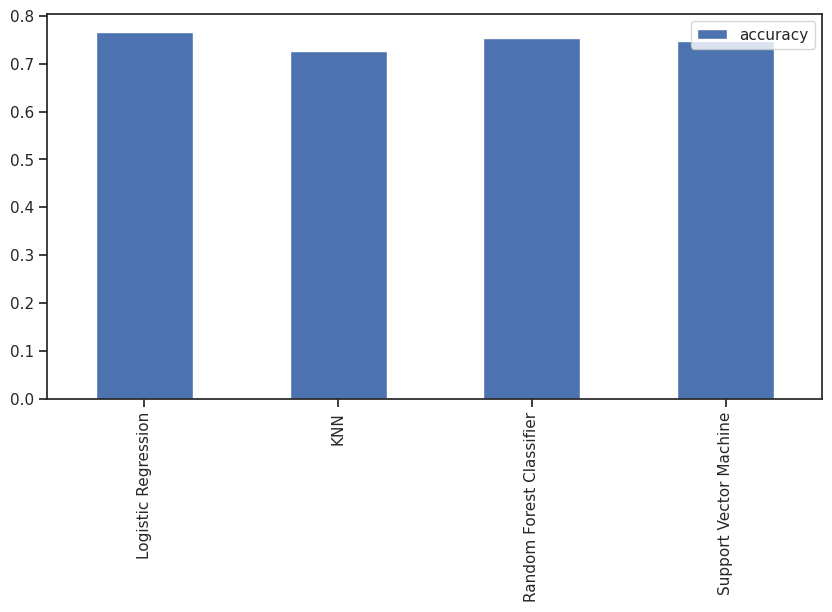

In [102]:
model_compare.T.plot.bar(figsize=(10,5));

# Hyperparameter tuning using RandomizedSearchcv

In [103]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}


In [104]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [105]:
score = rs_log_reg.score(X_test,y_test)
score

0.7597402597402597

# Using Grid Search CV Logistic Regression

In [106]:
log_reg_grid = {'C': np.logspace(-4,4,30),
               "solver":["liblinear"]}

#setup  the gird cv
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

#fit grid search cv
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [107]:
gs_log_reg.score(X_test,y_test)

0.7597402597402597

## Evaluating the tuned model by RandomizedSearchcv

In [108]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [109]:
np.array(y_test)

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

# ROC Curve

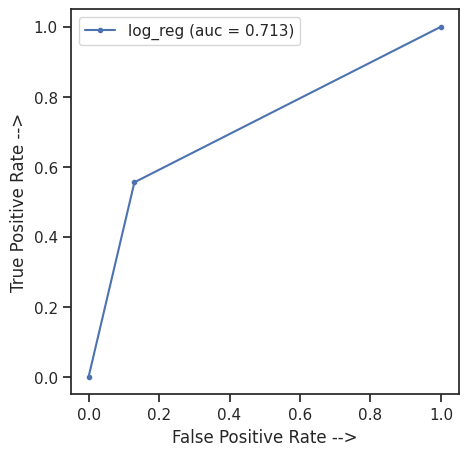

In [110]:
from sklearn.preprocessing import LabelEncoder

# Convert y_test to a binary or multiclass format
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Plot the ROC curve
log_reg_fpr, log_reg_tpr, threshold = roc_curve(y_test_encoded, y_preds)
auc_log_reg = auc(log_reg_fpr, log_reg_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(log_reg_fpr, log_reg_tpr, marker='.', label='log_reg (auc = %0.3f)' % auc_log_reg)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

# Confusion Matrix

In [111]:
#COnfusion matrix
print(confusion_matrix(y_test,y_preds))

[[87 13]
 [24 30]]


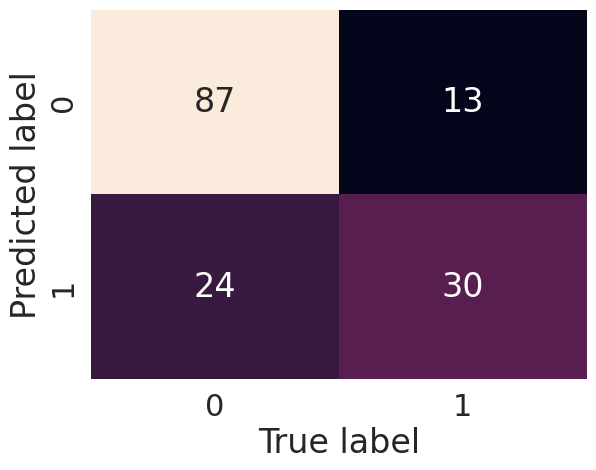

In [112]:
sns.set(font_scale=2)
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_preds), annot=True,cbar=False, fmt='g')
plt.xlabel("True label")
plt.ylabel("Predicted label");

In [113]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.70      0.56      0.62        54

    accuracy                           0.76       154
   macro avg       0.74      0.71      0.72       154
weighted avg       0.75      0.76      0.75       154



# Best Parameters

In [114]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 4.893900918477489, 'solver': 'liblinear'}

# Classifier with Best Parameters

In [115]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

# Cross Validation

In [116]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="accuracy")
cv_acc

array([0.75324675, 0.75324675, 0.74025974, 0.71428571, 0.71428571,
       0.75324675, 0.76623377, 0.80263158, 0.71052632, 0.78947368])

In [117]:
cv_acc = np.mean(cv_acc)
cv_acc

0.7497436773752563

# Cross Validation Percision

In [118]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.7142036215119739

# Cross Validation Recall

In [119]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.48091168091168085

# Cross Validation F1-Scores

In [120]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=10,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.569372018074834

# Visualize the CV Scores

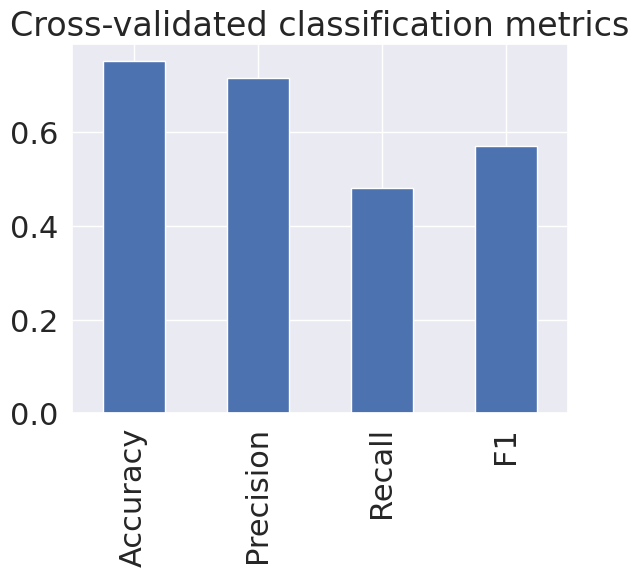

In [121]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

In [127]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [128]:
clf.coef_

array([[ 1.03586661e-01,  1.91975039e-02, -2.42253219e-02,
         3.41968653e-04,  7.57153287e-04,  2.91436344e-02,
         3.52128808e-01, -1.10108675e-03]])

In [129]:
feature_dict = dict(zip(data.columns, list(clf.coef_[0])))
feature_dict

{'Pregnancies': 0.10358666131745592,
 'Glucose': 0.019197503853550492,
 'BloodPressure': -0.024225321887926657,
 'SkinThickness': 0.00034196865310132937,
 'Insulin': 0.0007571532866078524,
 'BMI': 0.02914363443265761,
 'DiabetesPedigreeFunction': 0.3521288082362217,
 'Age': -0.0011010867493875106}

# Feature Importance

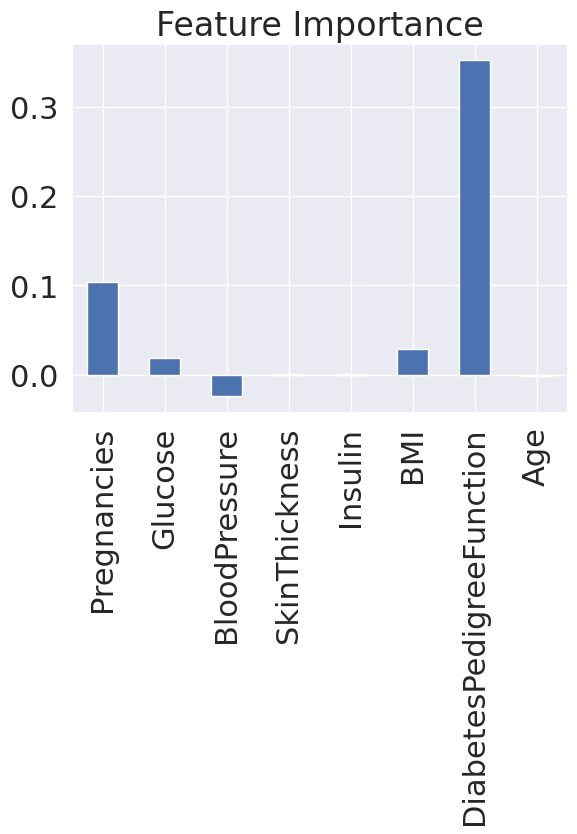

In [130]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [131]:
import pickle

# Save trained model to file
pickle.dump(gs_log_reg, open("Diabetes.pkl", "wb"))

In [132]:
loaded_model = pickle.load(open("Diabetes.pkl", "rb"))
loaded_model.predict(X_test)
loaded_model.score(X_test,y_test)

0.7597402597402597

In [133]:
## Enter the new data
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
414,0,138,60,35,167,34.6,0.534,21
508,2,84,50,23,76,30.4,0.968,21
102,0,125,96,0,0,22.5,0.262,21
194,8,85,55,20,0,24.4,0.136,42
645,2,157,74,35,440,39.4,0.134,30


In [134]:
Pregnancies = input()
Glucose = input()
BloodPressure = input()
SkinThickness = input()
Insulin = input()
BMI = input()
DiabetesPedigreeFunction = input()
Age = input()

2
84
50
23
76
30.4
0.968
30


In [135]:
row_df = pd.DataFrame([pd.Series([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI ,DiabetesPedigreeFunction ,Age])])

In [136]:
row_df

,0,1,2,3,4,5,6,7
0,2,84,50,23,76,30.4,0.968,30


In [137]:
prob = loaded_model.predict_proba(row_df)[0][1]
print(f"The probability of you having Diabetes is {prob}")

The probability of you having Diabetes is 0.15778508998176805


In [138]:
loaded_model.predict(row_df)[0]

0